Looking at Metrics and Plots Made From the Command Line
-------------------------------------------------------

Following the getting started guide we have run a pipeline from the command line to produce the coadd quality core plots and metrics.

In [1]:
from lsst.analysis.tools.tasks.reconstructor import reconstructAnalysisTools
import lsst.daf.butler as dafButler
from lsst.analysis.tools.interfaces._task import _StandinPlotInfo

import numpy as np

/home/d/dagoret/repos/repos_w_2023_44/analysis_tools/python/lsst/analysis/tools/tasks/astrometricCatalogMatch.py:35: FutureWarning: lsst.pipe.tasks.configurableActions is deprecated; it has been moved to lsst.pex.config.configurableActions. Accessing though lsst.pipe.tasks will be removed from Science Pipelines after release 26.0.0
  from lsst.pipe.tasks.configurableActions import ConfigurableActionStructField


Let's read back in the data that we just made

In [2]:
#collection = "/sdf/group/rubin/u/sr525/coaddQualityCoreDemoRepo"
collection ="LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553"
repo = '/sdf/group/rubin/repo/oga/'
dataId = {"tract": 5615, "skymap": "latiss_v1"}
Butler = dafButler.Butler(repo)

The reconstructor contains all of the plots/metrics that we just made, we specify the label and that gives us just the ones in that section of the pipeline.

In [3]:
anaList = list(Butler.registry.queryDatasetTypes('*ana*'))
# Note: please ignore the Spectractor WARNING messages below, they are to be expected here.
for ana in anaList:
    print(ana)

DatasetType('analyzeSourceTableCore_config', {}, Config)
DatasetType('analyzeSourceTableCore_metadata', {band, instrument, detector, physical_filter, visit}, TaskMetadata)
DatasetType('analyzeSourceTableCore_log', {band, instrument, detector, physical_filter, visit}, ButlerLogRecords)
DatasetType('analyzeMatchedVisitCore_config', {}, Config)
DatasetType('analyzeSourceTableCoreDevel_config', {}, Config)
DatasetType('analyzeSourceTableCoreDevel_metadata', {band, instrument, physical_filter, visit}, TaskMetadata)
DatasetType('analyzeSourceTableCoreDevel_log', {band, instrument, physical_filter, visit}, ButlerLogRecords)
DatasetType('analyzeMatchedVisitQualityCore_config', {}, Config)
DatasetType('analyzeMatchedVisitQualityCore_metadata', {instrument, skymap, tract}, TaskMetadata)
DatasetType('analyzeMatchedVisitQualityCore_log', {instrument, skymap, tract}, ButlerLogRecords)
DatasetType('analyzeMatchedVisitCore_metadata', {instrument, skymap, tract}, TaskMetadata)
DatasetType('analyzeMatc

In [4]:
taskState, inputData = reconstructAnalysisTools(Butler, 
                                                collection=collection,
                                                label="analyzeObjectTableCore",
                                                dataId=dataId, 
                                                callback=None
)

Let's list the actions that were run

In [5]:
for action in taskState.atools:
    print(action.identity)

e1Diff
e2Diff
shapeSizeFractionalDiff
skyFluxStatisticMetric
skyObjectFlux
skyObjectSky
wPerpCModel
wPerpPSFP
xPerpCModel
xPerpPSFP


Now we can recreate them, we're going to pick one and look at it.

AttributeError: 'str' object has no attribute 'generateTract'

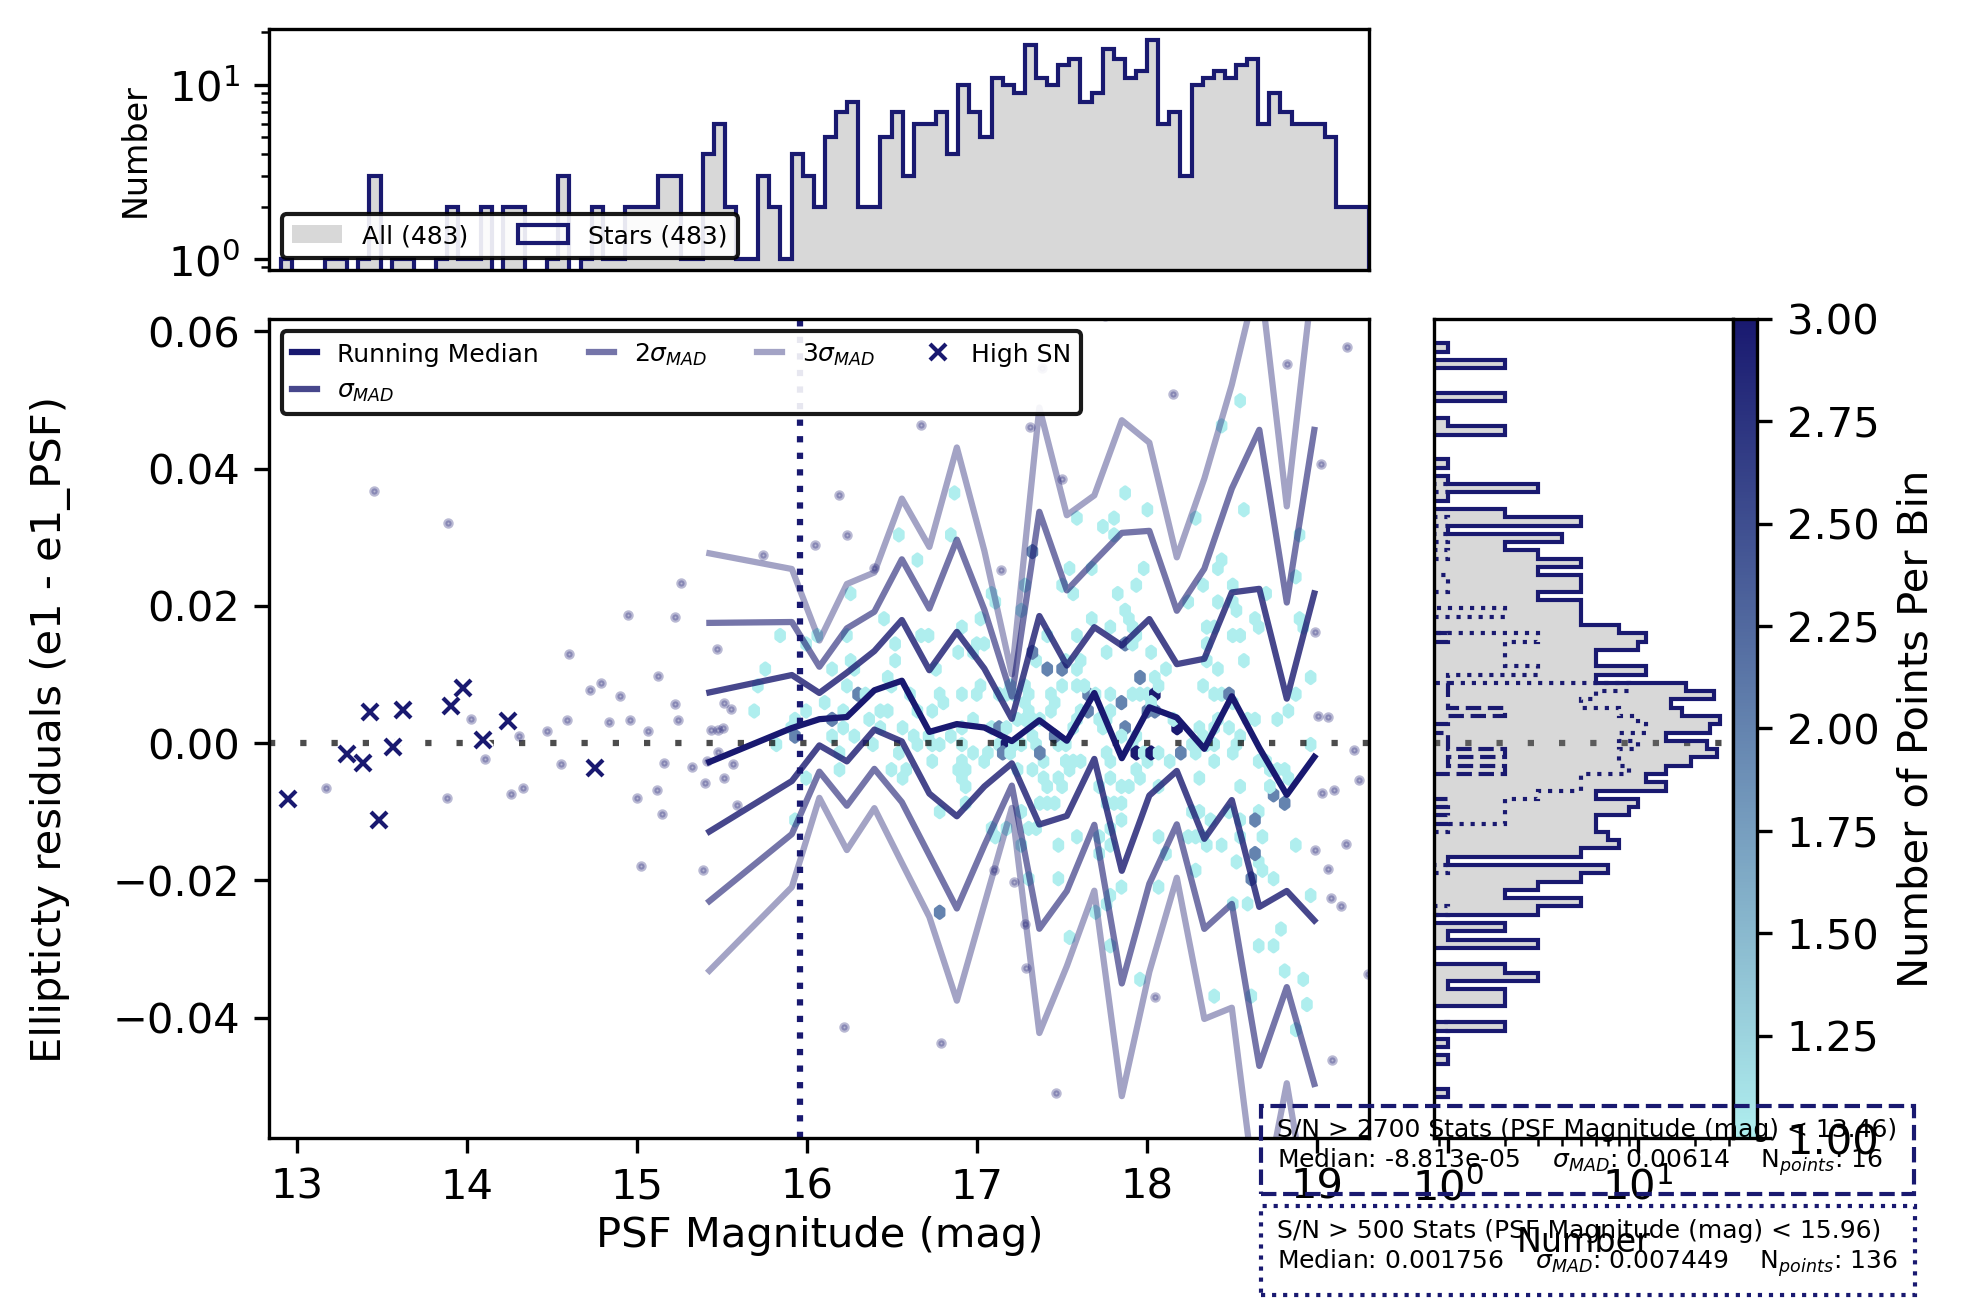

In [9]:
plotInfoDict = {"run": collection, "bands": "i", "tract": 5615, "tableName": "objectTable_tract"}
taskState.atools.e1Diff(inputData["data"], plotInfo=plotInfoDict, skymap="latiss_v1", band="i")

Let's see the selectors that were used

In [10]:
for selector in taskState.atools.e1Diff.prep.selectors:
    print(selector.identity)

flagSelector
snSelector


We can look at each step individually

AttributeError: 'NoneType' object has no attribute 'generateTract'

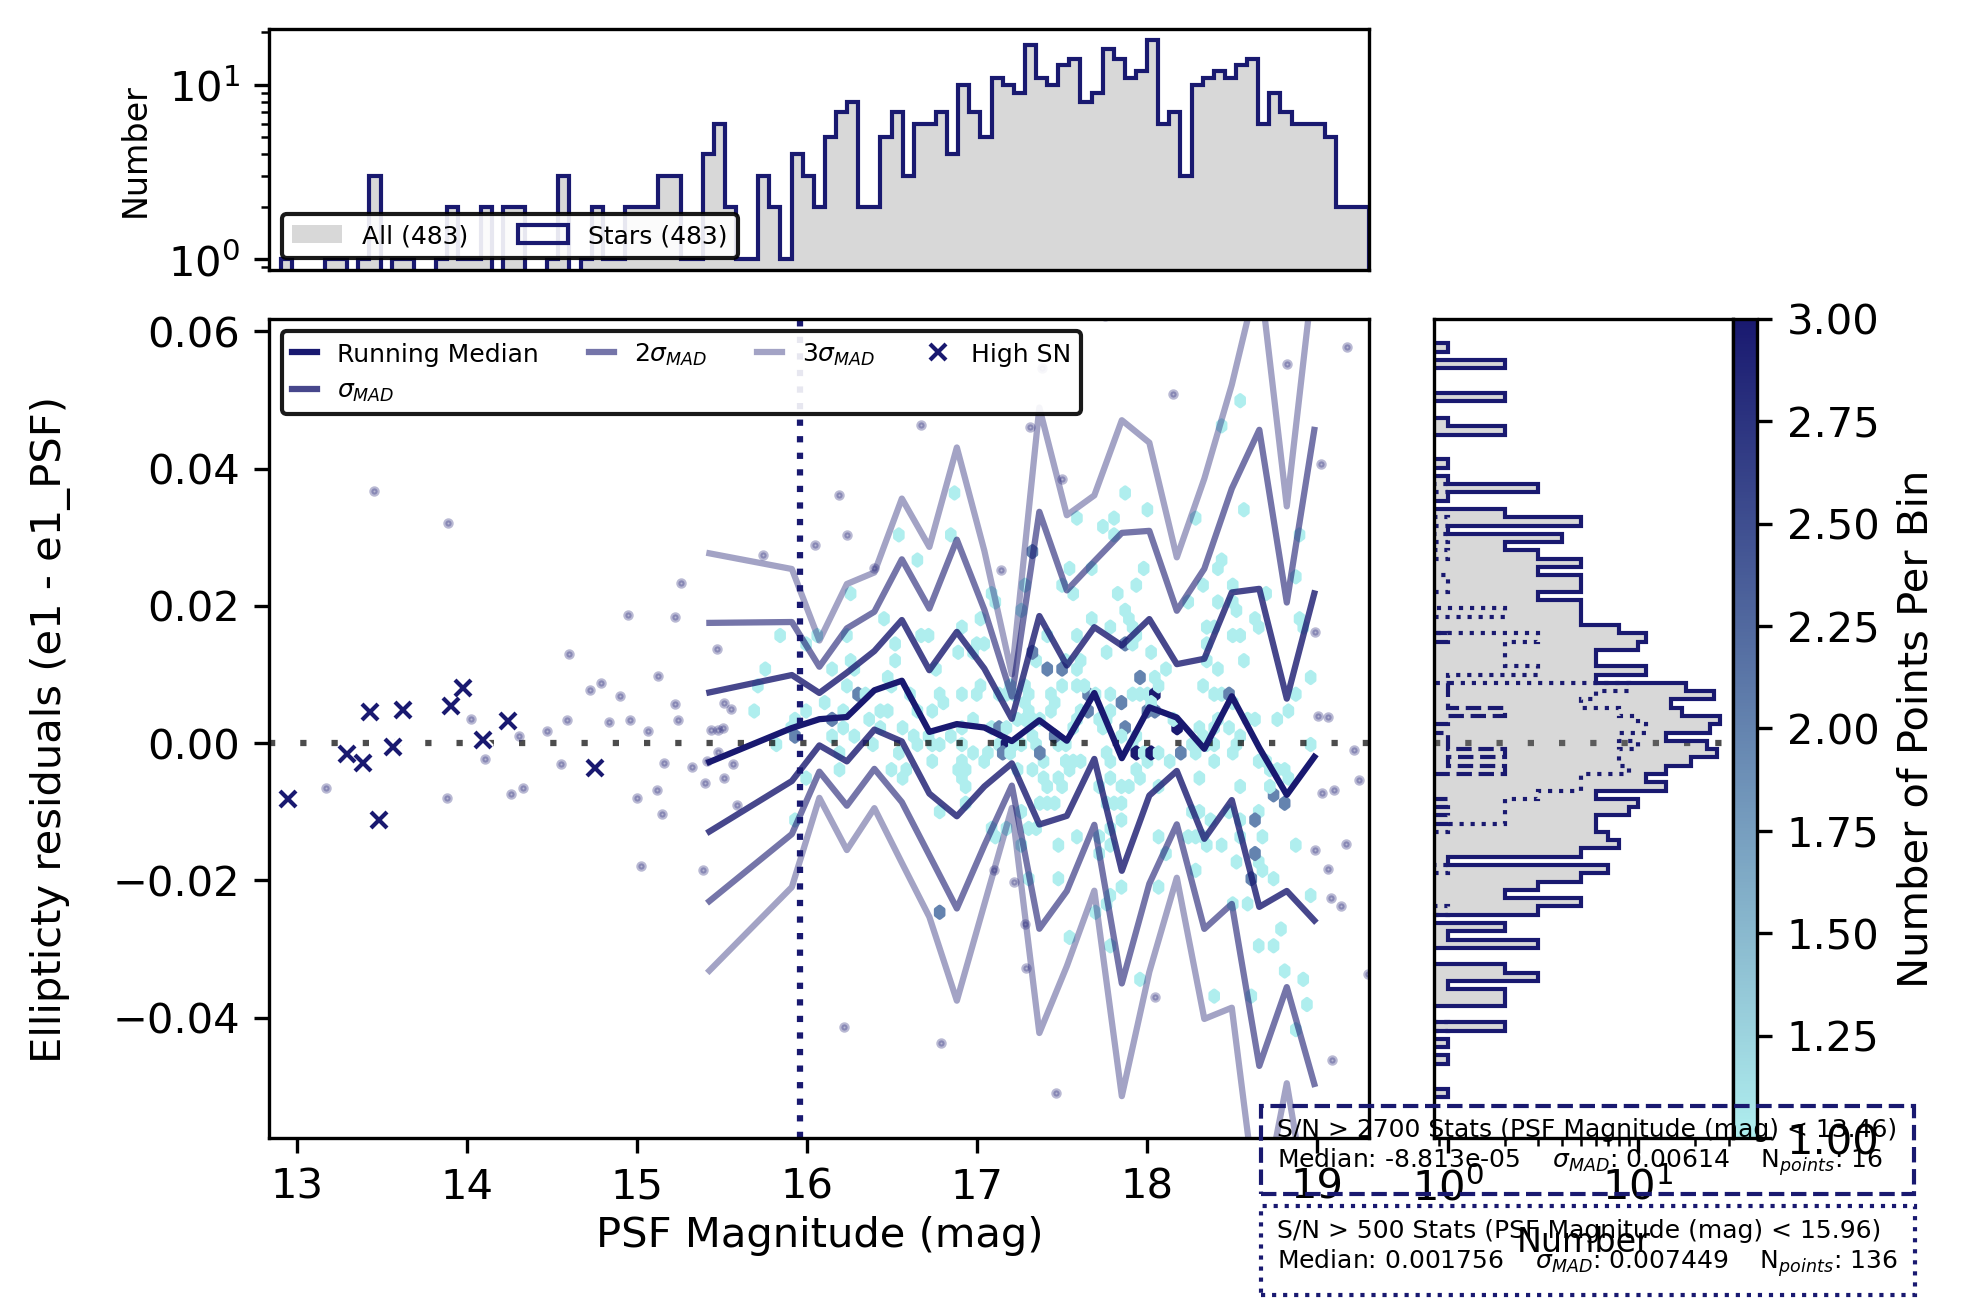

In [11]:
prep = taskState.atools.e1Diff.prep(inputData["data"], plotInfo=plotInfoDict, skymap=None, band="i")
#print("Prep:", prep)
process = taskState.atools.e1Diff.process(prep, band="i")
#print("Process:", process)
produce = taskState.atools.e1Diff.produce(process, band="i", plotInfo=plotInfoDict, skymap=None)
#print("Produce:", produce)

Let's change something about the selectors and then re run the plot

AttributeError: 'NoneType' object has no attribute 'generateTract'

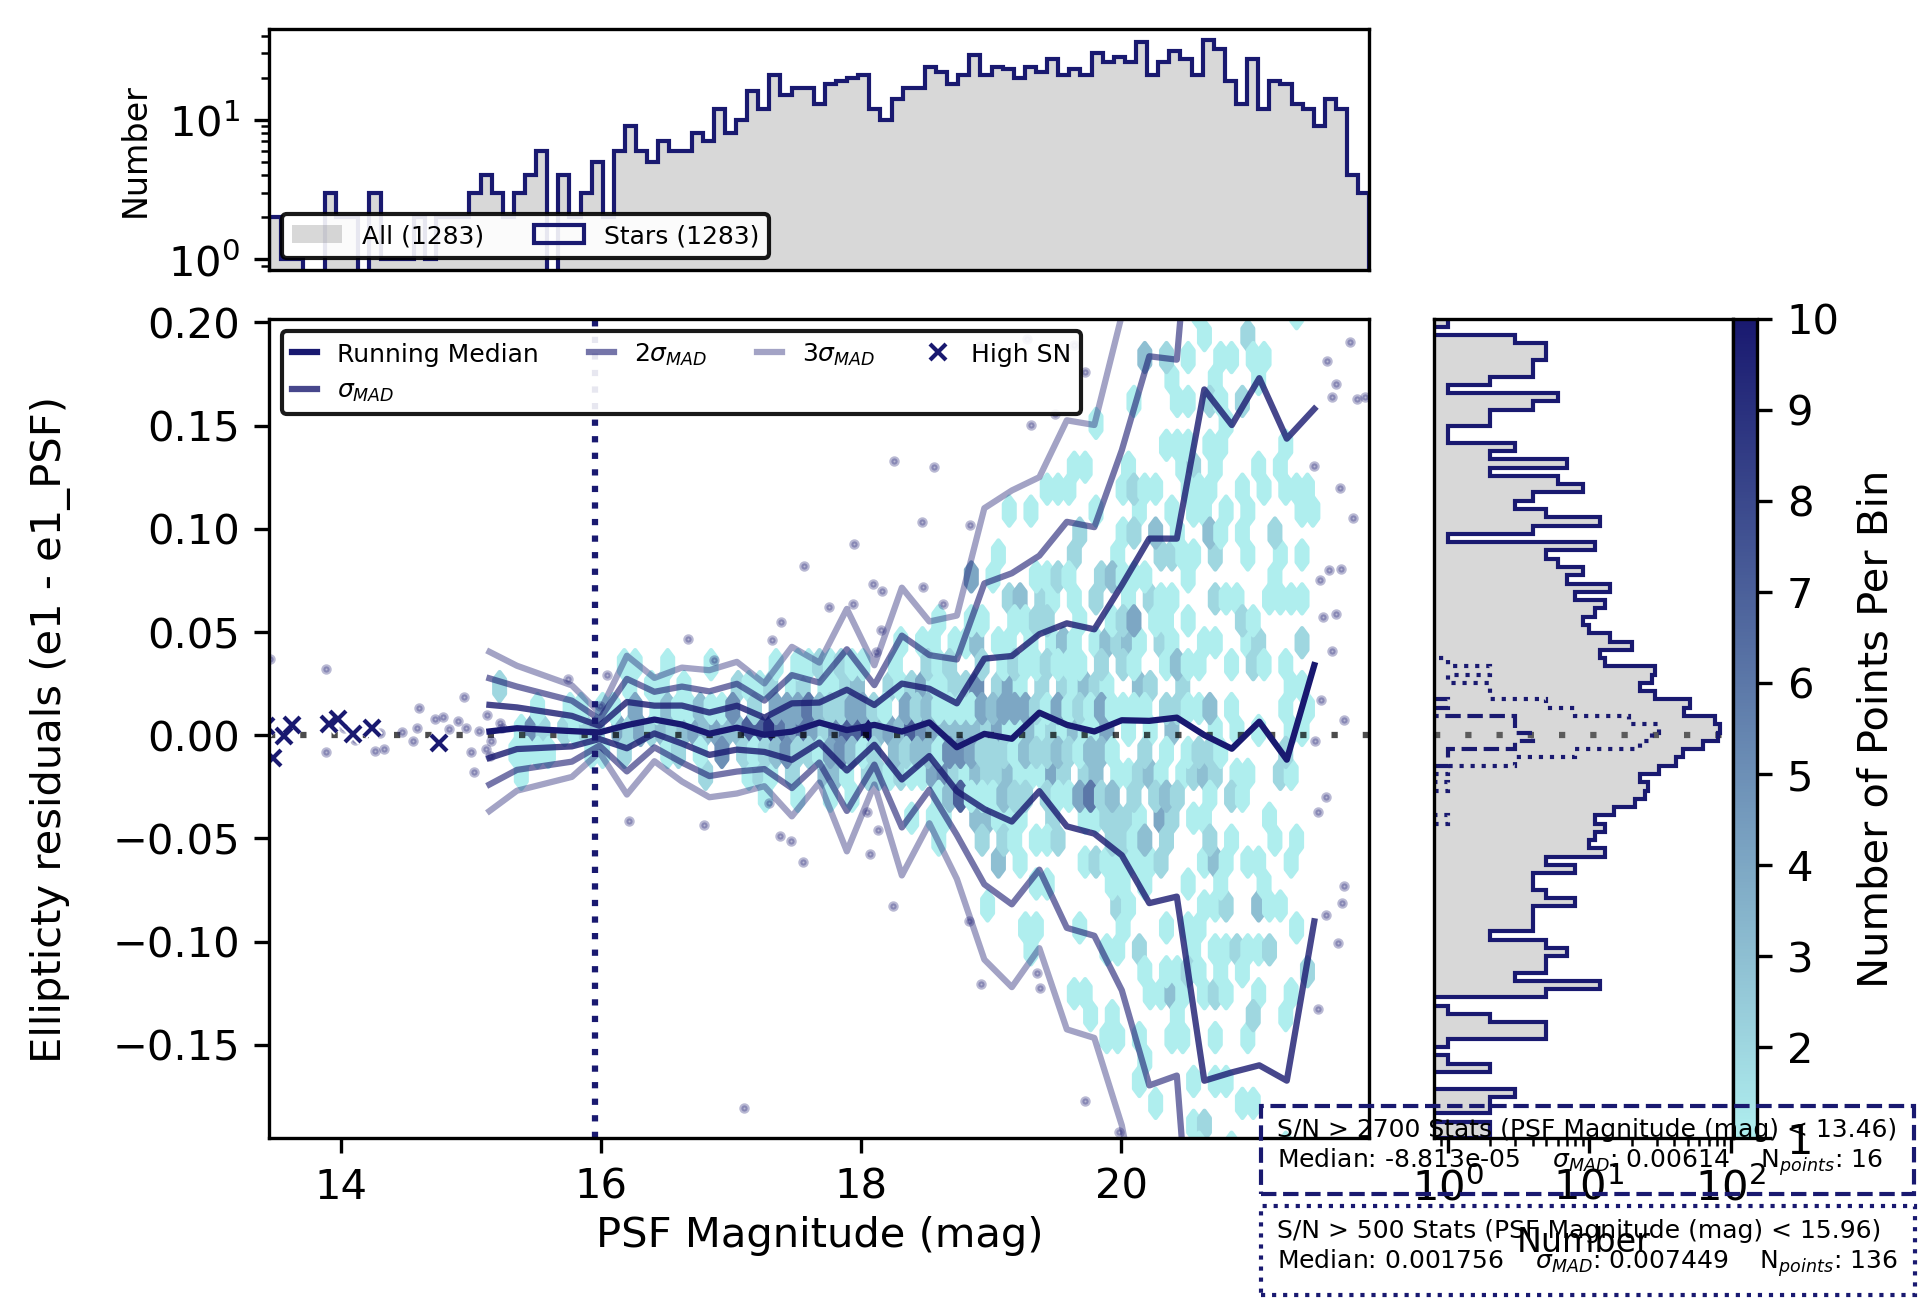

In [12]:
taskState.atools.e1Diff.prep.selectors.snSelector.threshold = 10
prep = taskState.atools.e1Diff.prep(inputData["data"], plotInfo=plotInfoDict, skymap=None, band="i")
process = taskState.atools.e1Diff.process(prep, band="i")
produce = taskState.atools.e1Diff.produce(process, band="i", plotInfo=plotInfoDict, skymap=None)

AttributeError: 'str' object has no attribute 'generateTract'

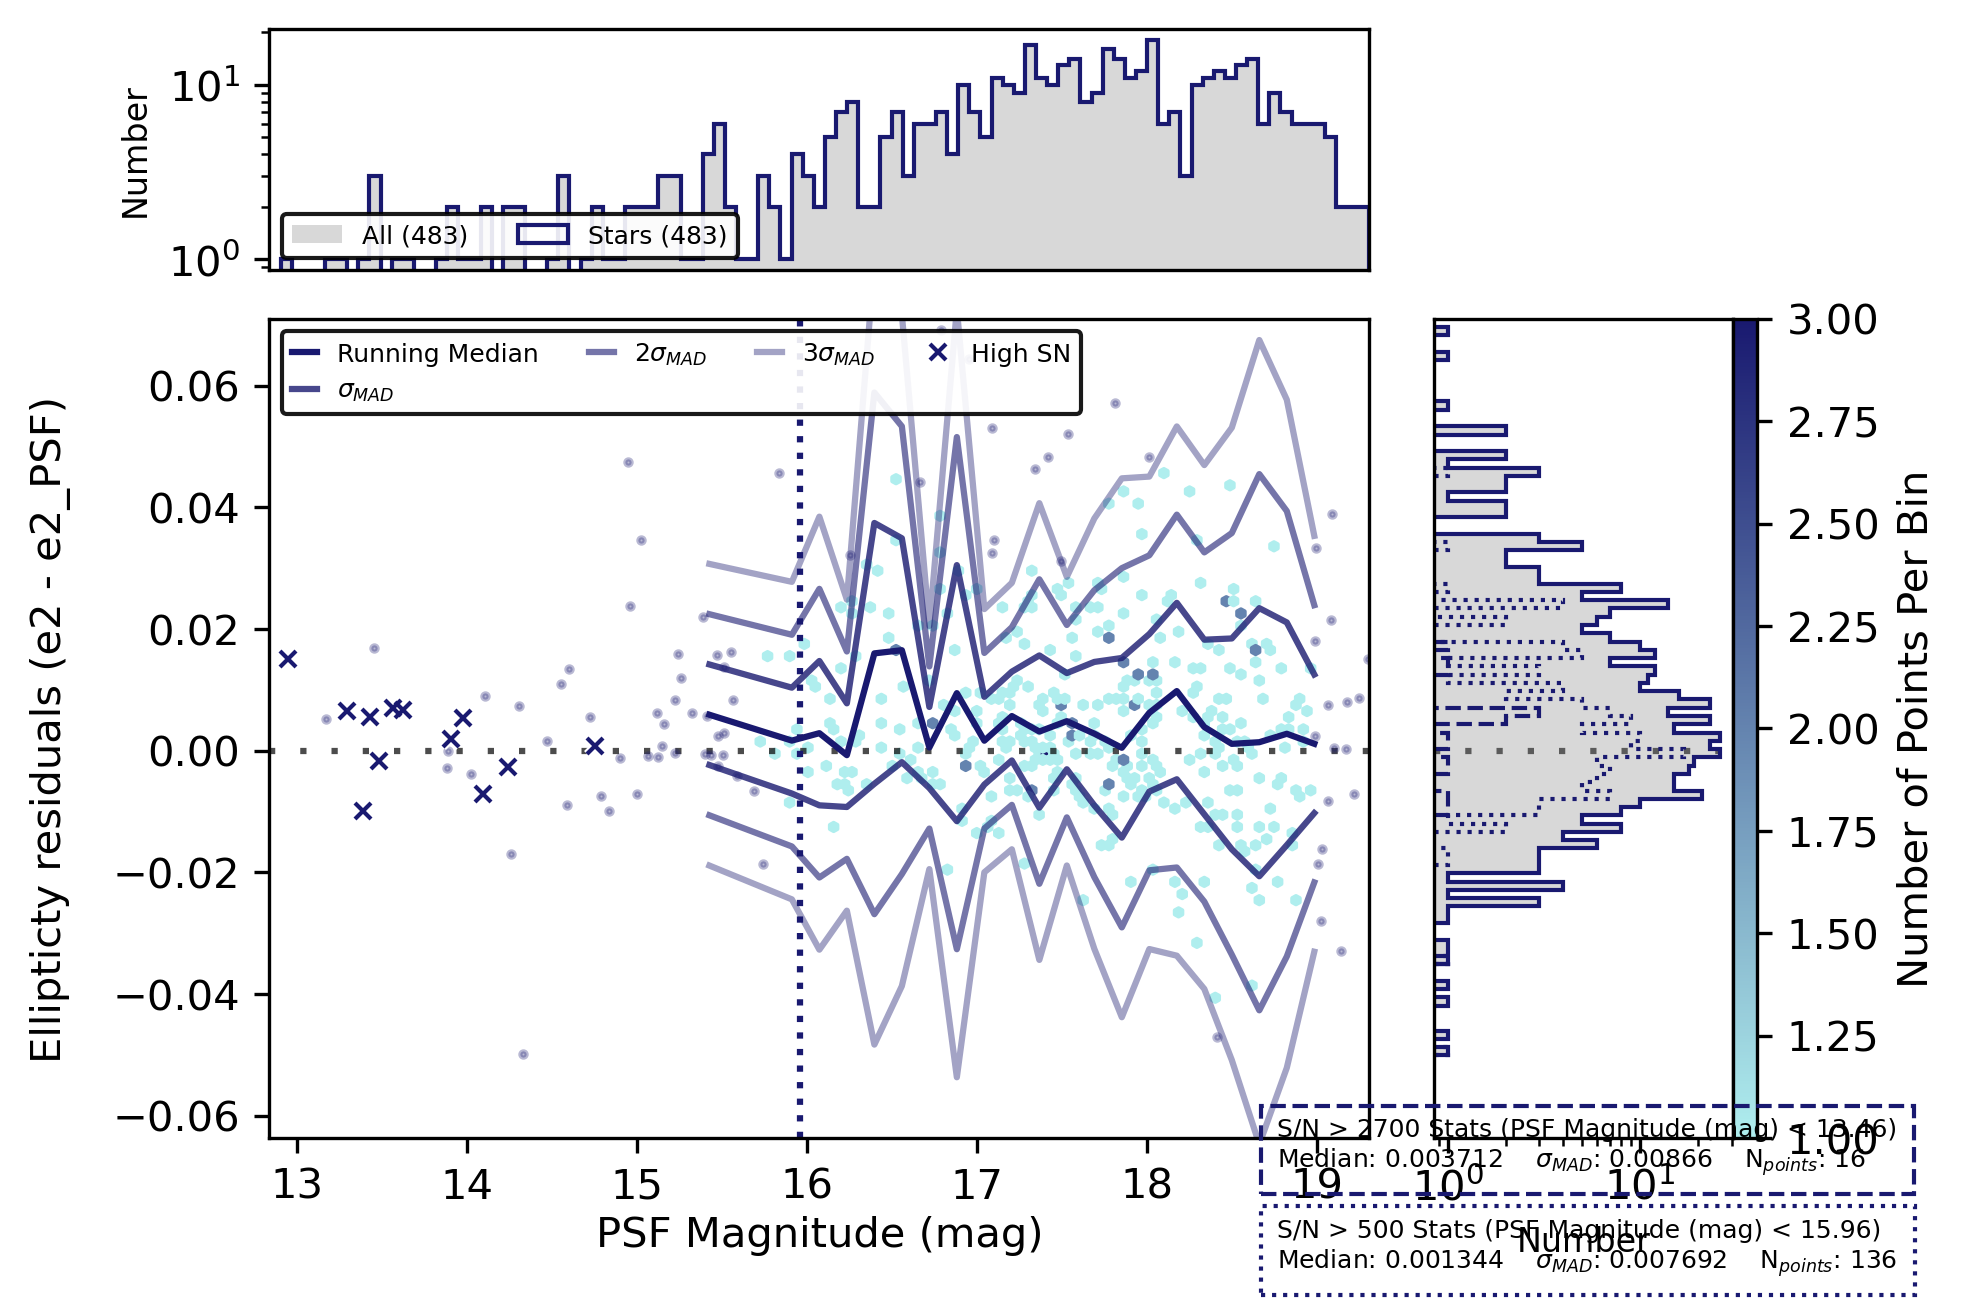

In [10]:
taskState.atools.e2Diff(inputData["data"], plotInfo=plotInfoDict, skymap="latiss_v1", band="i")

## shapeSizeFractionalDiff

AttributeError: 'str' object has no attribute 'generateTract'

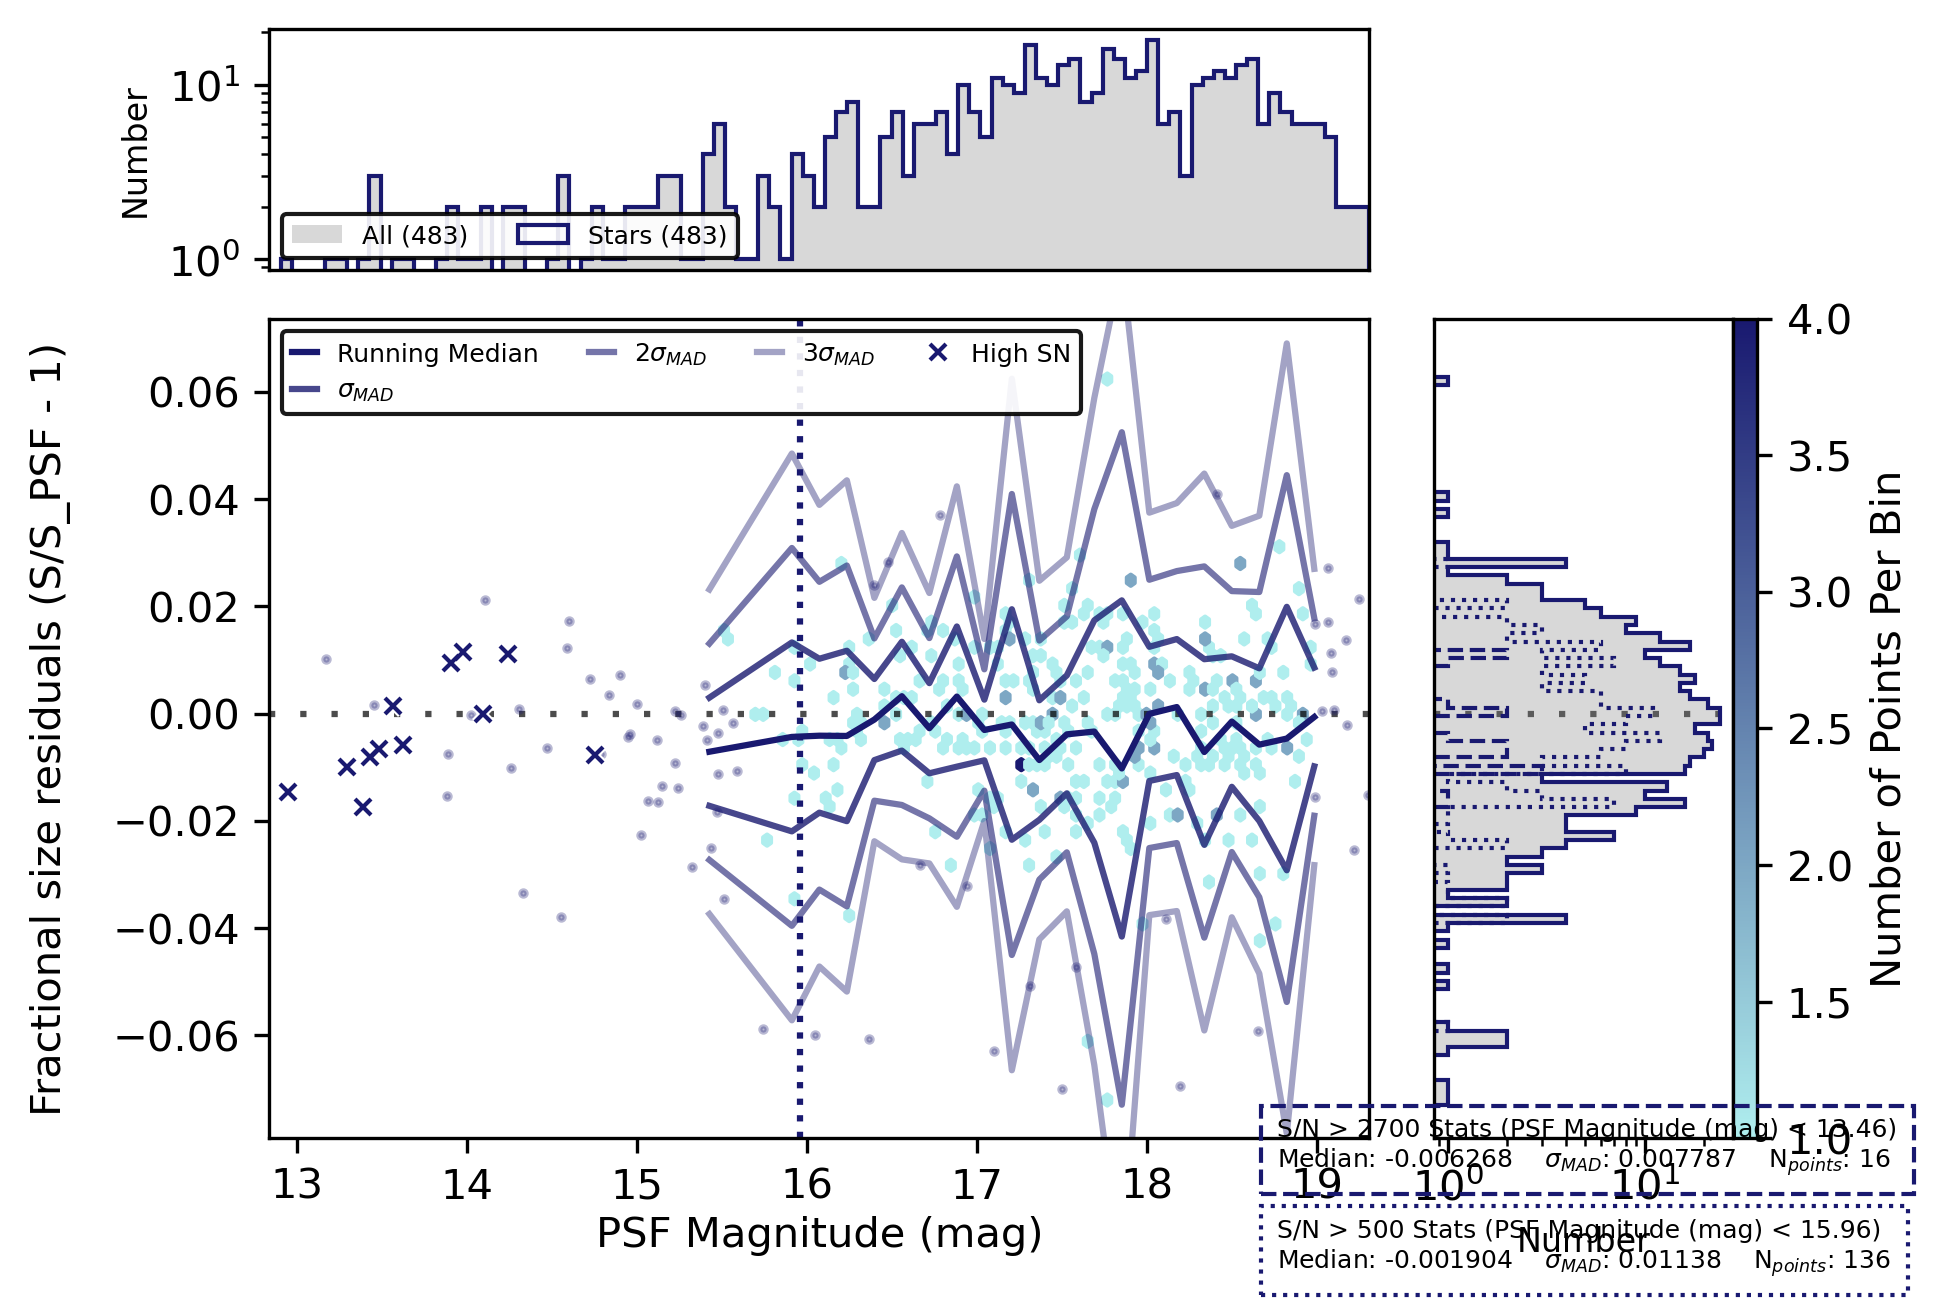

In [11]:
taskState.atools.shapeSizeFractionalDiff(inputData["data"], plotInfo=plotInfoDict, skymap="latiss_v1", band="i")

## skyFluxStatisticMetric

In [12]:
taskState.atools.skyFluxStatisticMetric(inputData["data"], plotInfo=plotInfoDict, skymap="latiss_v1", band="i")

{'skyFluxStatisticMetric_i_medianSky': Measurement('i_medianSky', <Quantity 96.65225356 nJy>, notes={'i_medianSky.metric_tags': []}),
 'skyFluxStatisticMetric_i_meanSky': Measurement('i_meanSky', <Quantity 72.32815134 nJy>, notes={'i_meanSky.metric_tags': []}),
 'skyFluxStatisticMetric_i_stdevSky': Measurement('i_stdevSky', <Quantity 1702.59456384 nJy>, notes={'i_stdevSky.metric_tags': []}),
 'skyFluxStatisticMetric_i_sigmaMADSky': Measurement('i_sigmaMADSky', <Quantity 927.38521887 nJy>, notes={'i_sigmaMADSky.metric_tags': []})}

## skyObjectFlux

{'skyObjectFlux_HistPlot': <Figure size 1920x1440 with 6 Axes>}

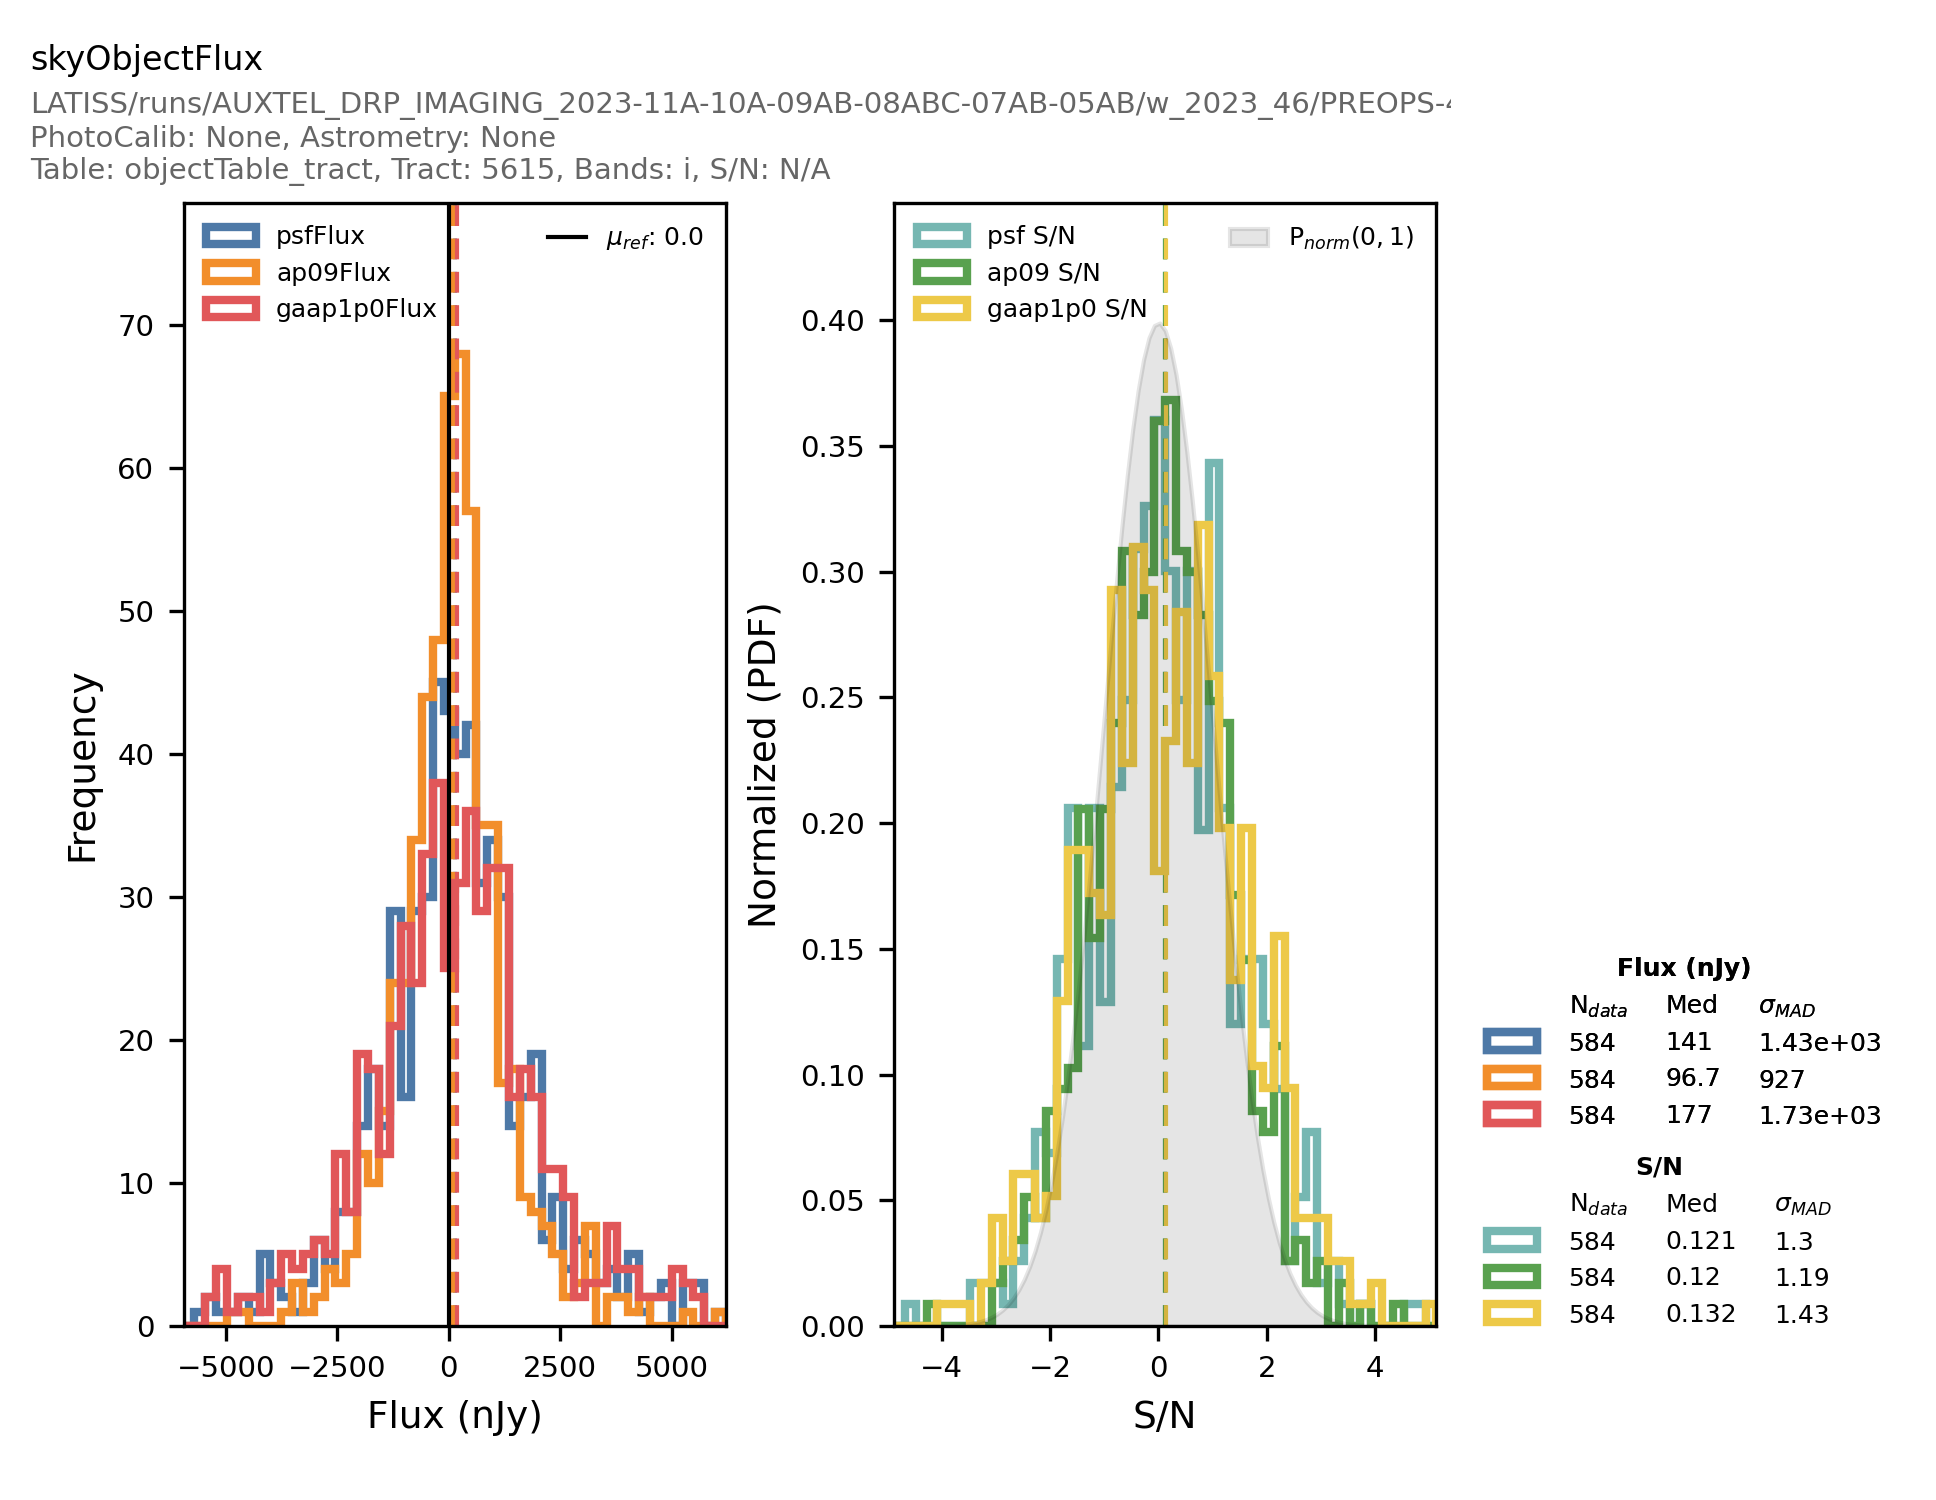

In [13]:
taskState.atools.skyObjectFlux(inputData["data"], plotInfo=plotInfoDict, skymap="latiss_v1", band="i")

## skyObjectSky

{'skyObjectSky_SkyPlot': <Figure size 1920x1440 with 2 Axes>}

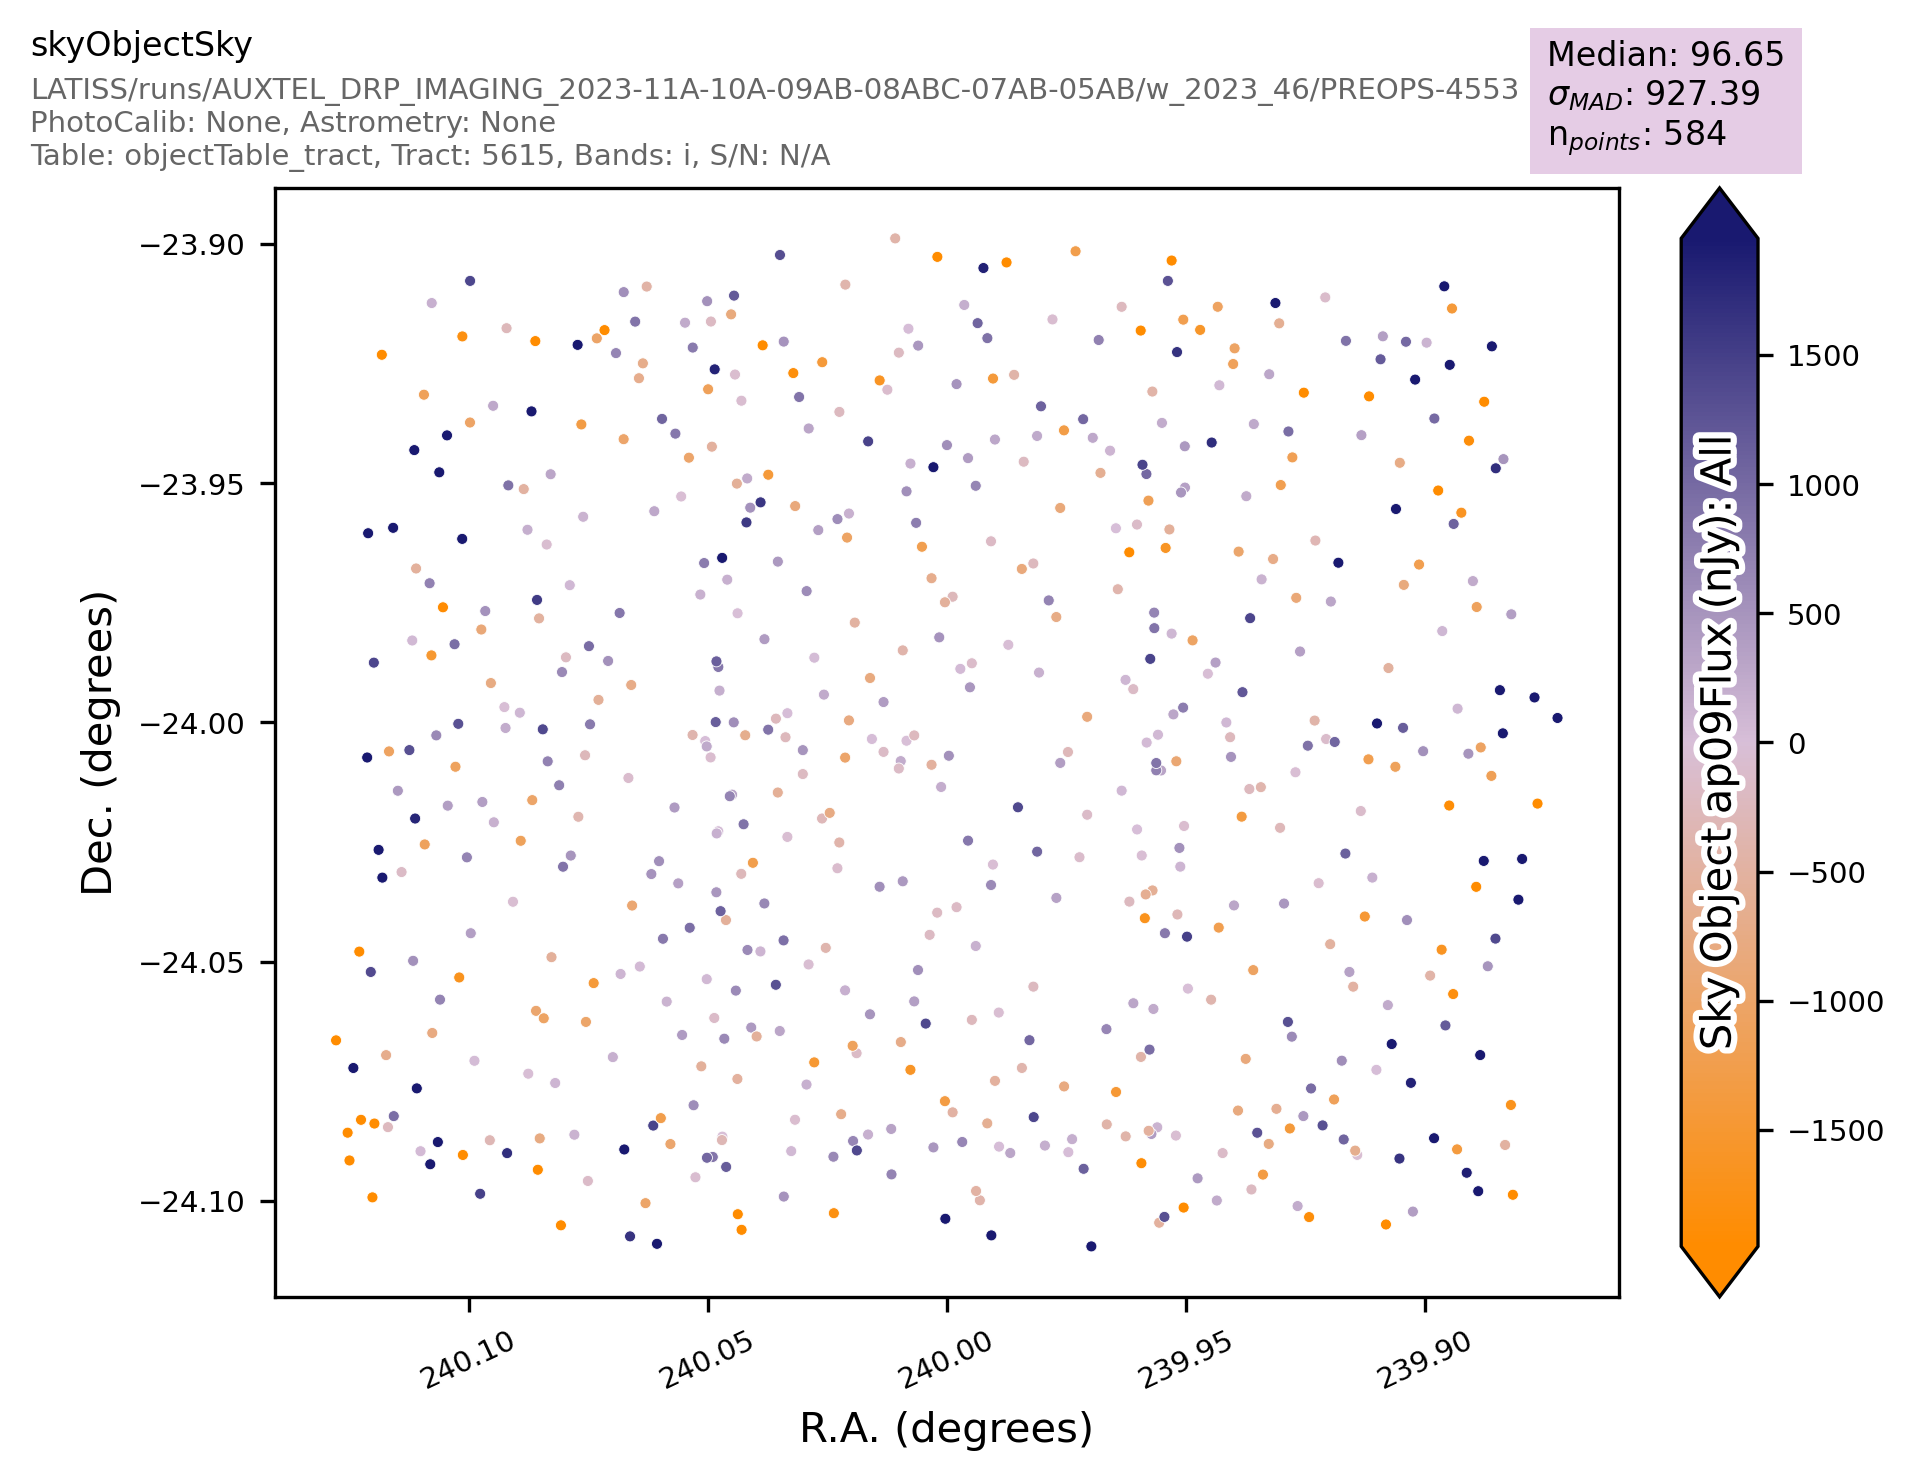

In [14]:
taskState.atools.skyObjectSky(inputData["data"], plotInfo=plotInfoDict, skymap="latiss_v1", band="i")

## wPerpCModel

{'wPerpCModel_ColorColorFitPlot': <Figure size 1920x1440 with 4 Axes>,
 'wPerpCModel_wPerp_cmodelFlux_sigmaMAD': Measurement('wPerp_cmodelFlux_sigmaMAD', <Quantity 22.6303226 mmag>, notes={'wPerp_cmodelFlux_sigmaMAD.metric_tags': []}),
 'wPerpCModel_wPerp_cmodelFlux_median': Measurement('wPerp_cmodelFlux_median', <Quantity 0.44709443 mmag>, notes={'wPerp_cmodelFlux_median.metric_tags': []})}

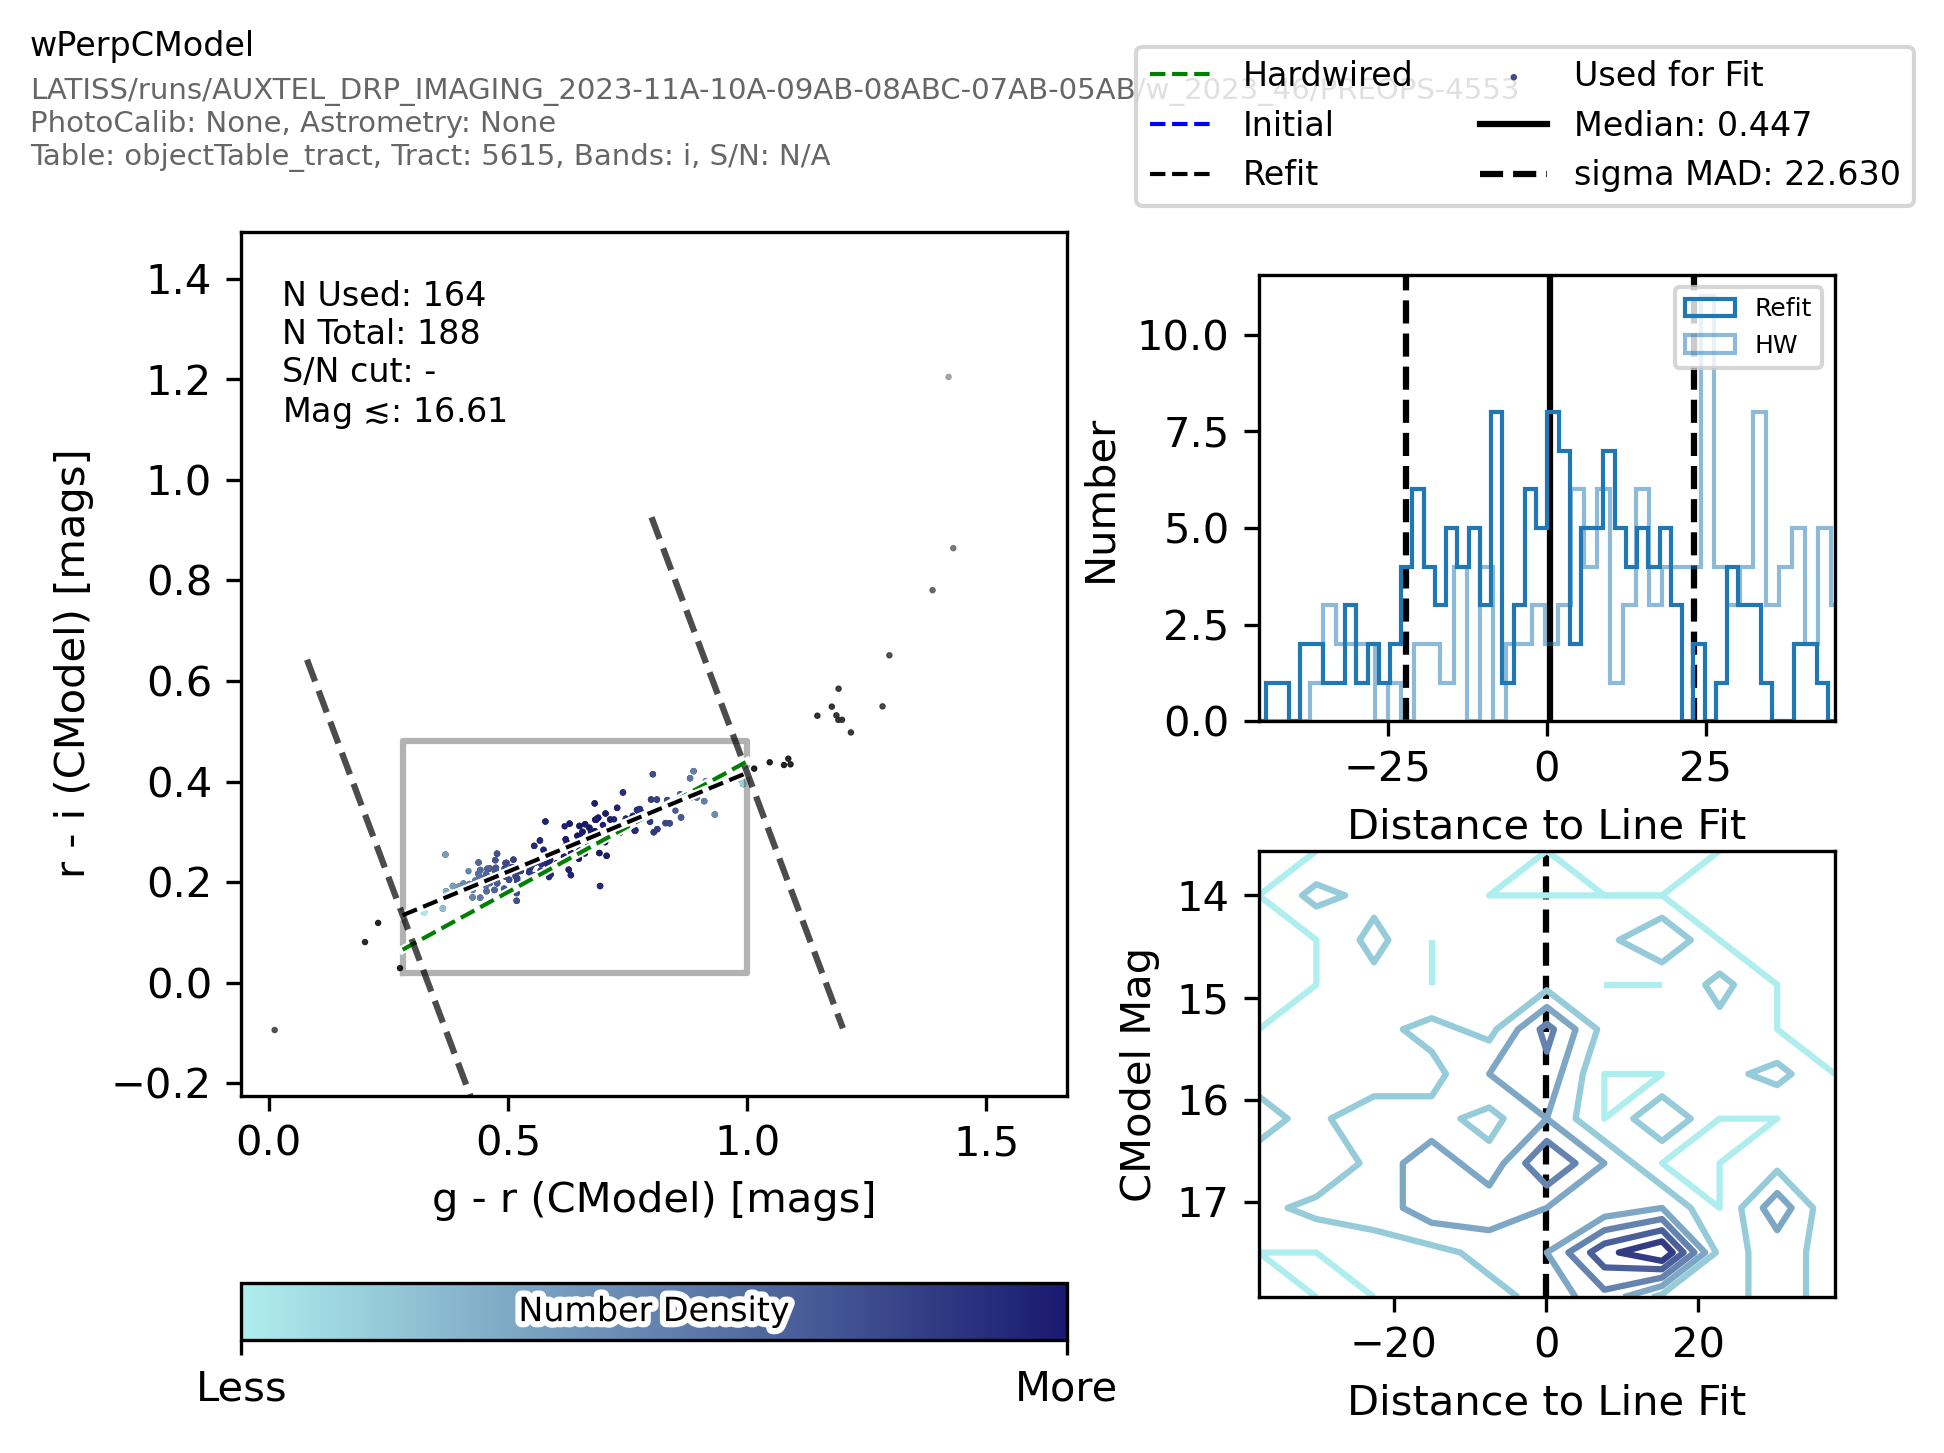

In [15]:
taskState.atools.wPerpCModel(inputData["data"], plotInfo=plotInfoDict, skymap="latiss_v1", band="i")

## wPerpPSFP

{'wPerpPSFP_ColorColorFitPlot': <Figure size 1920x1440 with 4 Axes>,
 'wPerpPSFP_wPerp_psfFlux_sigmaMAD': Measurement('wPerp_psfFlux_sigmaMAD', <Quantity 20.77778787 mmag>, notes={'wPerp_psfFlux_sigmaMAD.metric_tags': []}),
 'wPerpPSFP_wPerp_psfFlux_median': Measurement('wPerp_psfFlux_median', <Quantity -1.29127163 mmag>, notes={'wPerp_psfFlux_median.metric_tags': []})}

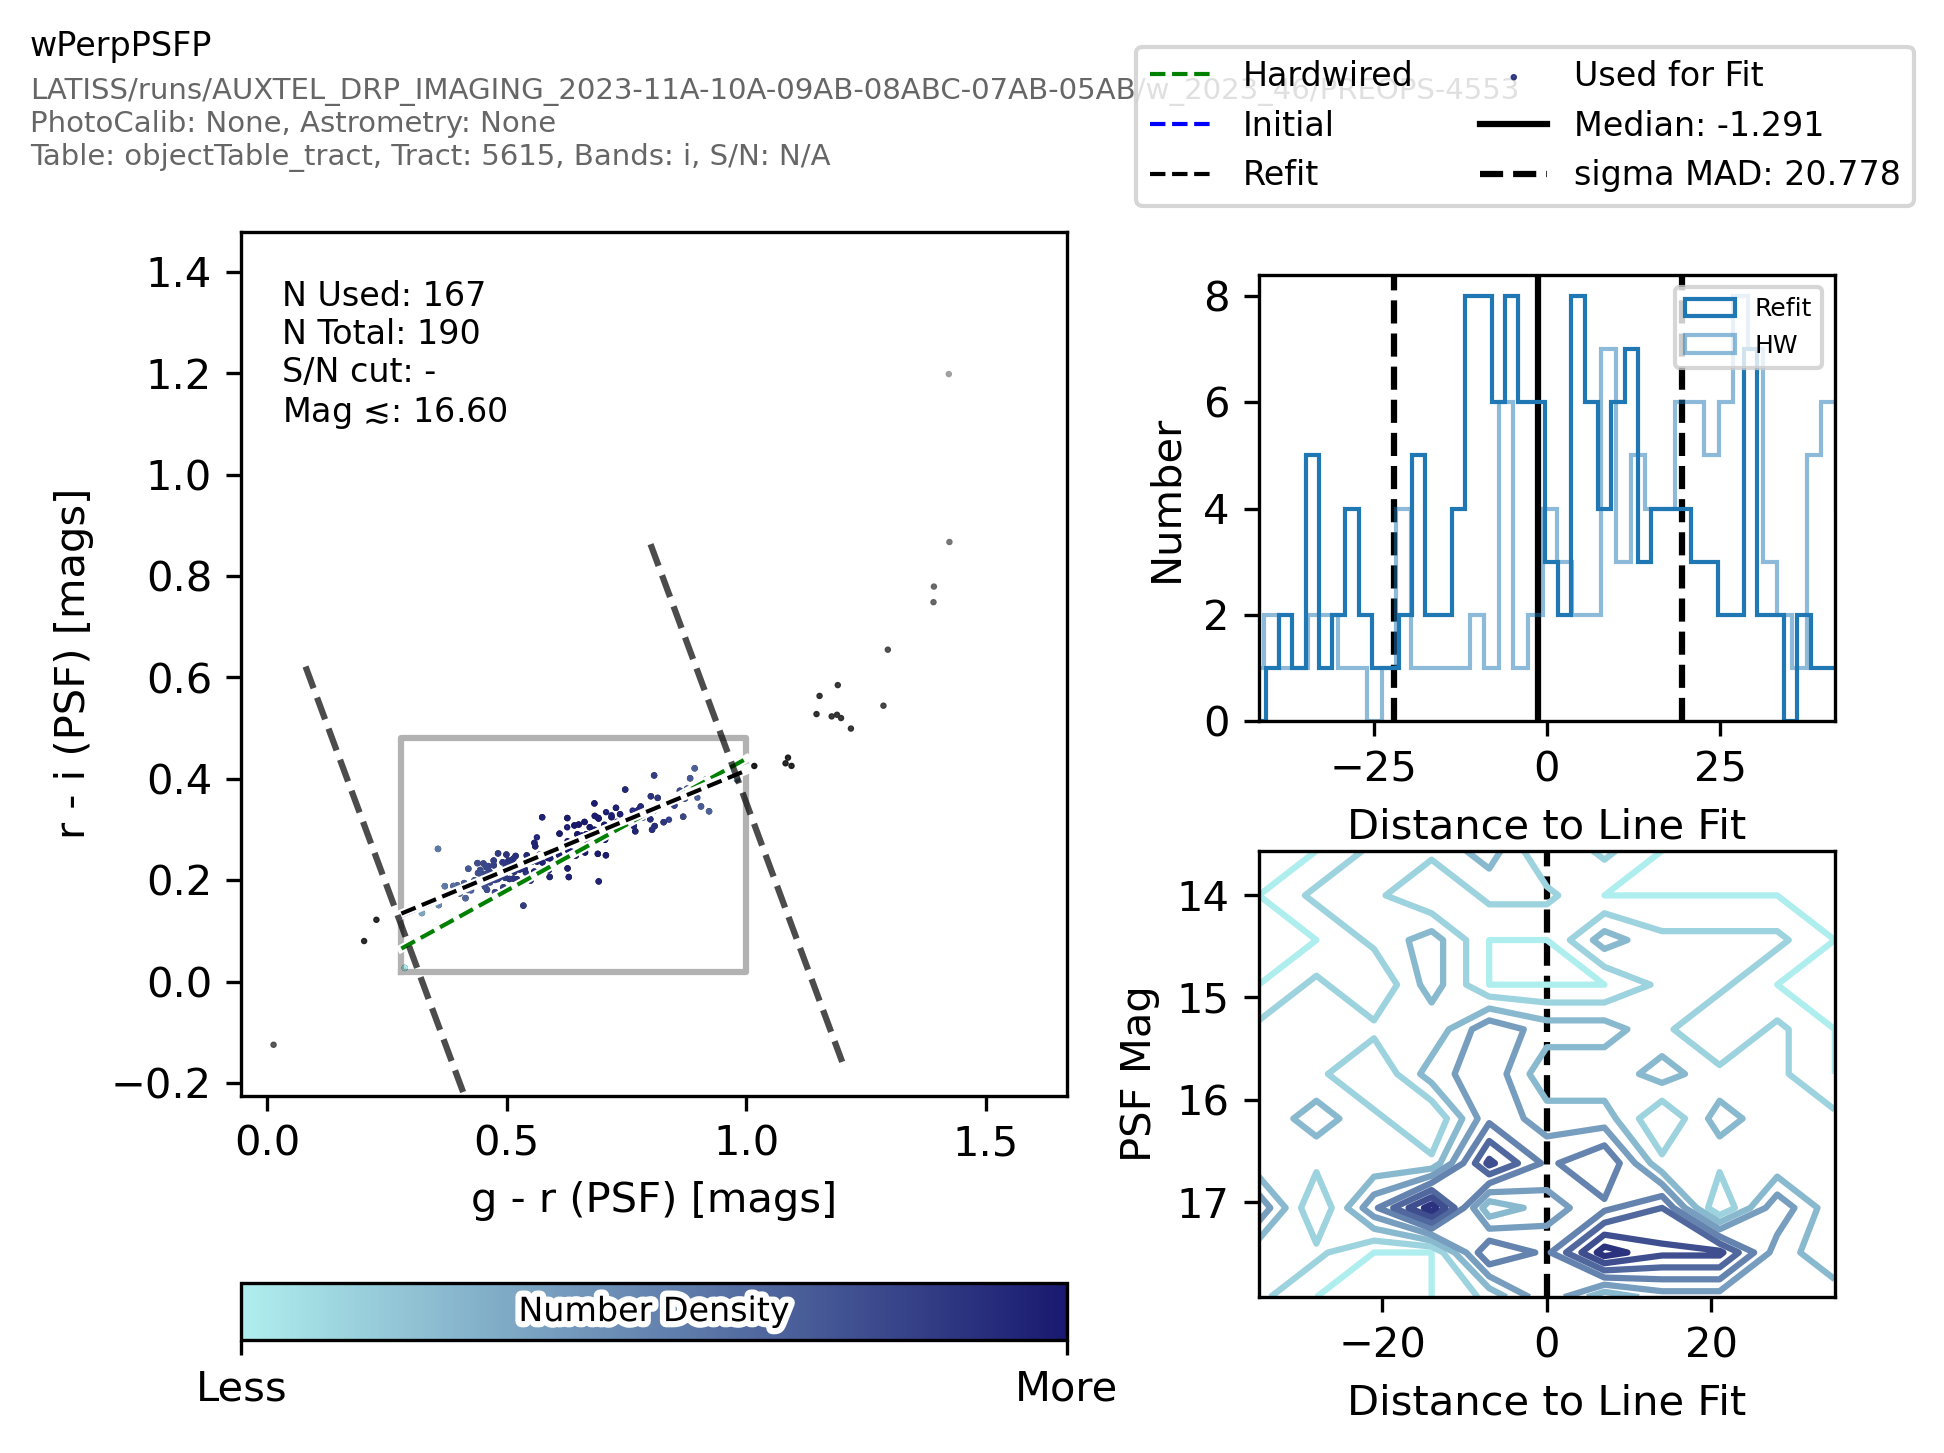

In [16]:
taskState.atools.wPerpPSFP(inputData["data"], plotInfo=plotInfoDict, skymap="latiss_v1", band="i")

## xPerpCModel

{'xPerpCModel_ColorColorFitPlot': <Figure size 768x576 with 0 Axes>,
 'xPerpCModel_xPerp_cmodelFlux_sigmaMAD': Measurement('xPerp_cmodelFlux_sigmaMAD', <Quantity 19.32979735 mmag>, notes={'xPerp_cmodelFlux_sigmaMAD.metric_tags': []}),
 'xPerpCModel_xPerp_cmodelFlux_median': Measurement('xPerp_cmodelFlux_median', <Quantity 4.39166812 mmag>, notes={'xPerp_cmodelFlux_median.metric_tags': []})}

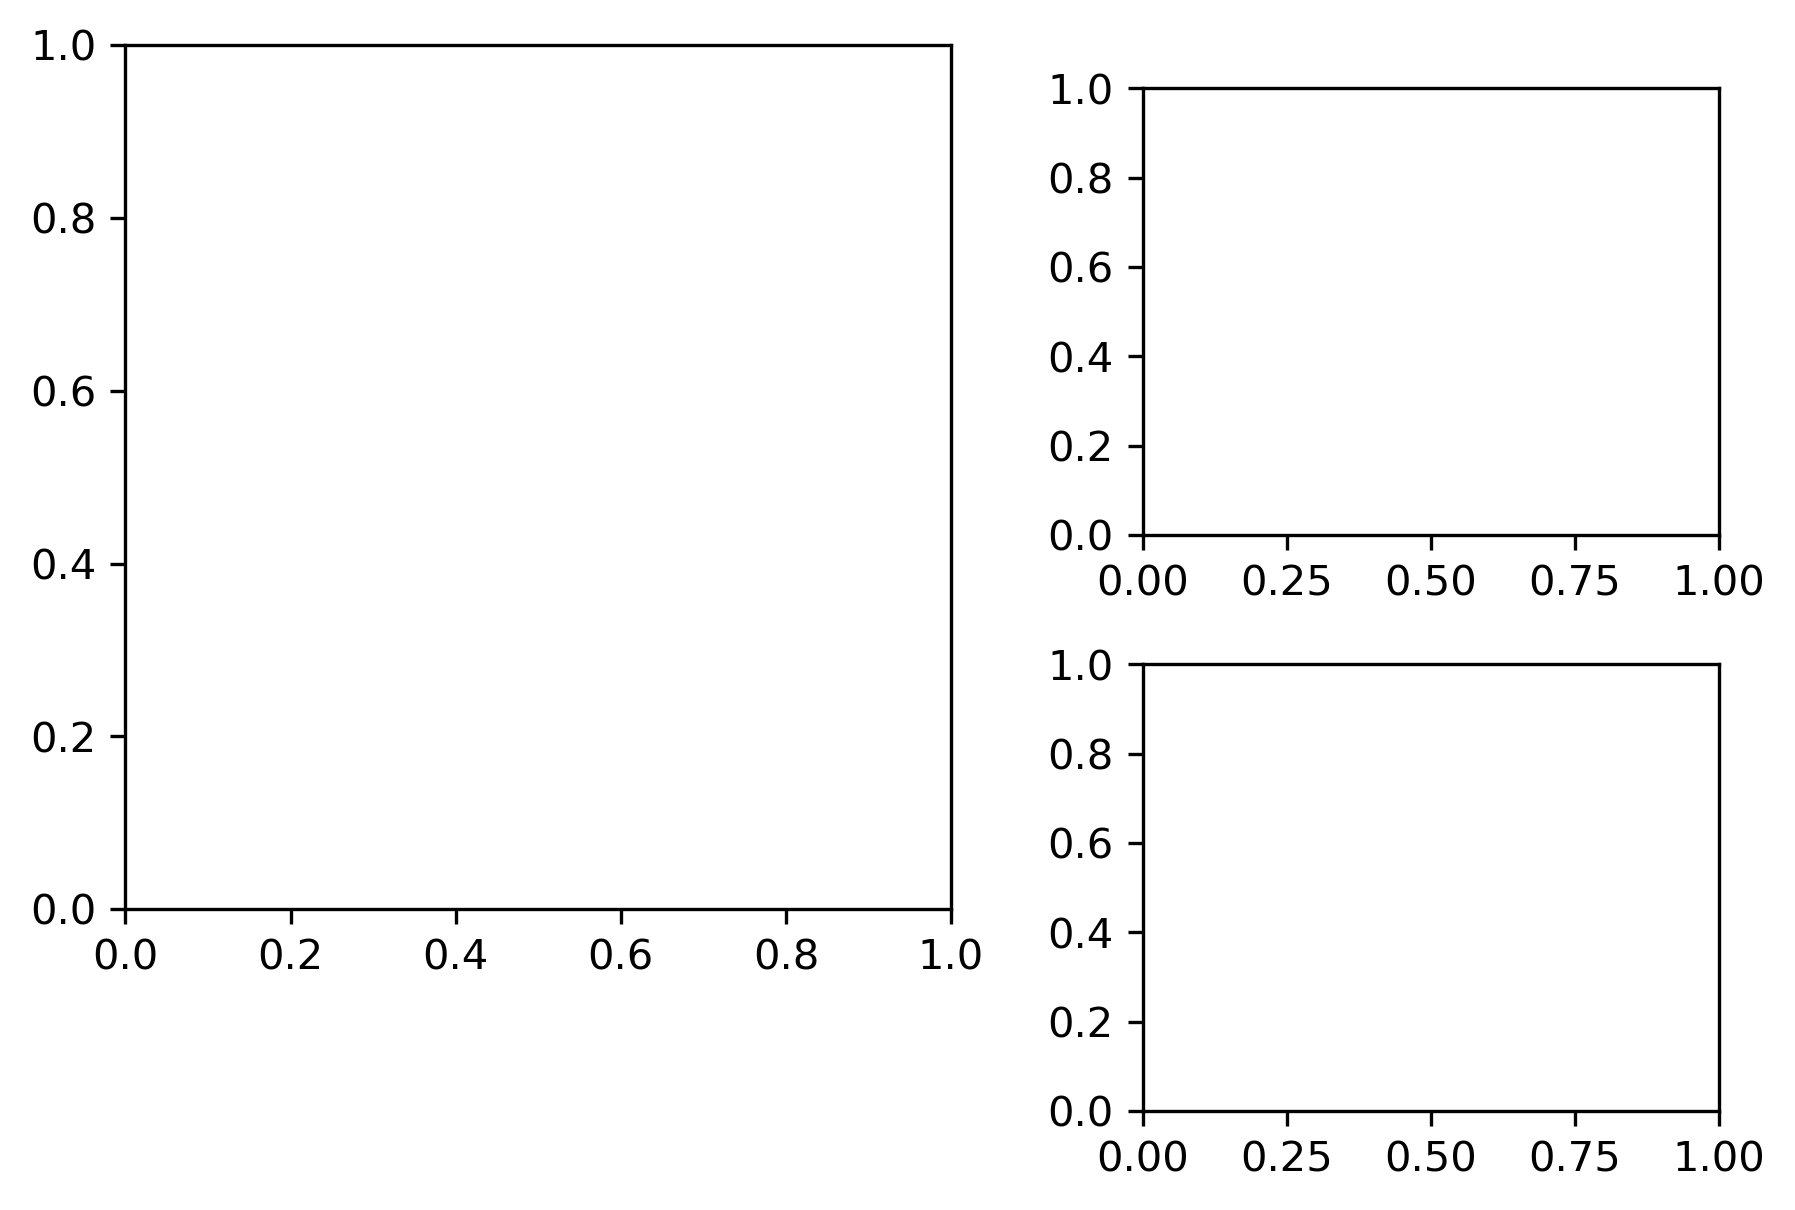

<Figure size 768x576 with 0 Axes>

In [17]:
taskState.atools.xPerpCModel(inputData["data"], plotInfo=plotInfoDict, skymap="latiss_v1", band="i")

## xPerpPSFP

{'xPerpPSFP_ColorColorFitPlot': <Figure size 768x576 with 0 Axes>,
 'xPerpPSFP_xPerp_psfFlux_sigmaMAD': Measurement('xPerp_psfFlux_sigmaMAD', <Quantity 23.77726789 mmag>, notes={'xPerp_psfFlux_sigmaMAD.metric_tags': []}),
 'xPerpPSFP_xPerp_psfFlux_median': Measurement('xPerp_psfFlux_median', <Quantity 5.68413576 mmag>, notes={'xPerp_psfFlux_median.metric_tags': []})}

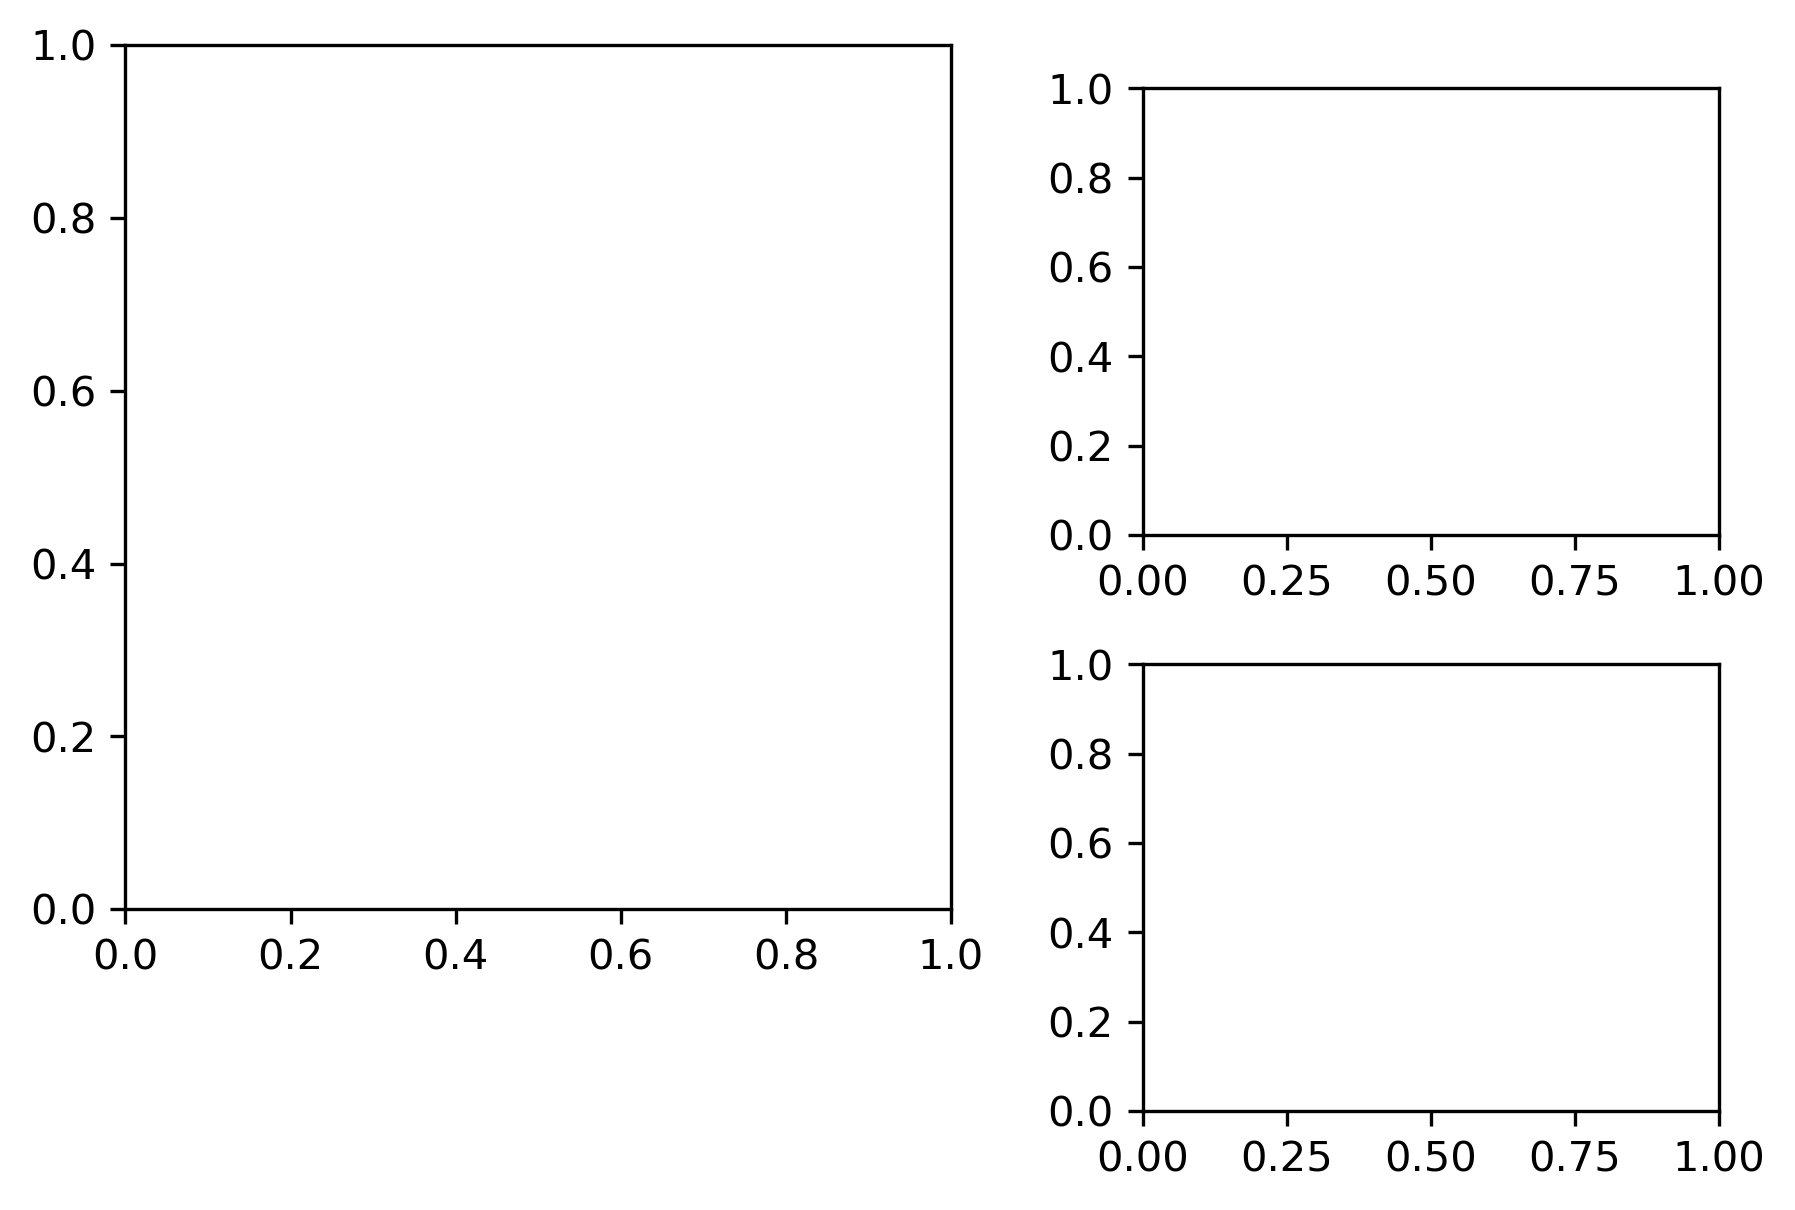

<Figure size 768x576 with 0 Axes>

In [18]:
taskState.atools.xPerpPSFP(inputData["data"], plotInfo=plotInfoDict, skymap="latiss_v1", band="i")
